In [43]:
import numpy as np
import matplotlib.pyplot as plt; plt.rc('font', size=16)
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns

cols = [cm.tab10(i) for i in range(10)]
cols.append(cm.Set2(5))
cols.append(cm.Paired(4))

In [2]:
raw_counts = pd.read_excel('COPROseq_rawcounts_and_DNA_yields.xlsx', sheet_name='Raw_counts')
dna_yieds = pd.read_excel('COPROseq_rawcounts_and_DNA_yields.xlsx', sheet_name='DNA_yields')
genome_size = pd.read_excel('COPROseq_rawcounts_and_DNA_yields.xlsx', sheet_name='Genome_size')

N_A = 6.02214076e23 # Avogadro's number
dsDNA_bp = 660 # Average mass of a DNA bp (g/mol)
unit_conversion = 1e6 # Convert from ug to g
conversion_factor = N_A/(dsDNA_bp*unit_conversion)

In [3]:
conversion_factor

912445569696969.6

In [4]:
raw_counts

,Strain,01-01,01-01-r1,01-02,01-03,01-05,01-07,01-10,01-12,01-13,...,15-29,15-30,15-31,15-33,15-35,15-38,15-40,15-41,15-42,15-CEC
0,B_caccae_ATCC_43185,4662,28518,72598,90757,90761,43961,38713,47831,42591,...,27031,73923,65570,203081,204656,225795,261540,145981,250616,401542
1,B_ovatus_ATCC_8483,8330,66063,169916,157855,182563,69461,5558,77031,86669,...,17201,7579,1767,5301,6507,6843,8071,6086,15165,16946
2,B_thetaiotaomicron_VPI-5482,3639,24562,76142,147517,211588,82272,14337,54122,55977,...,23595,53246,42963,137392,118051,164264,204214,183137,252820,332110
3,B_uniformis_ATCC_8492,440,4428,4617,14112,32379,14689,3338,15498,15371,...,4612,11342,7656,22550,17774,27056,23763,18286,49599,53369
4,B_vulgatus_ATCC_8482,17711,412906,132224,104042,159878,77457,28659,36031,39085,...,53179,91247,44173,167332,200621,232121,328177,161095,268588,326432
5,B_WH2_closed,8878,61078,281681,436720,834727,312998,49724,229893,311218,...,55939,75706,57077,256189,224229,313596,246003,75657,88325,101017
6,C_aerofaciens_ATCC_25986,60,187,2844,5418,6777,3186,205,2419,2415,...,726,1062,711,347,668,536,358,579,2142,2115
7,C_scindens_ATCC_35704,1565,15886,11403,10153,11103,5237,1321,6789,4148,...,5187,6106,7428,6985,11135,7155,7066,16116,34857,39587
8,C_spiroforme_DSM_1552,1,76,1664,3604,1482,159,314,183,33,...,48,50,54,380,660,292,405,481,442,1407
9,D_longicatena_DSM_13814,38,775,108,7,1,2,0,1,1,...,7,10,10,20,29,30,49,14,20,47


In [5]:
dna_yieds

,Mouse,Day,DNA Yield (ug)
0,1,1,5.57
1,2,1,6.60
2,3,1,5.03
3,4,1,2.30
4,5,1,1.99
...,...,...,...
385,11,cecum,5.09
386,12,cecum,5.25
387,13,cecum,4.46
388,14,cecum,4.97


In [6]:
genome_size

,Strain,Genome_length (bp)
0,B_caccae_ATCC_43185,4564814
1,B_ovatus_ATCC_8483,6463169
2,B_thetaiotaomicron_VPI-5482,6293399
3,B_uniformis_ATCC_8492,4717497
4,B_vulgatus_ATCC_8482,5163189
5,B_WH2_closed,7082128
6,C_aerofaciens_ATCC_25986,2439869
7,C_scindens_ATCC_35704,3619444
8,C_spiroforme_DSM_1552,2507485
9,D_longicatena_DSM_13814,2913833


In [7]:
raw_counts_long = raw_counts.melt(id_vars=['Strain'], var_name='Mouse-Day', value_name='Raw_counts')
raw_counts_long['Mouse'] = raw_counts_long['Mouse-Day'].str.split('-').str[0]
raw_counts_long['Day'] = raw_counts_long['Mouse-Day'].str.split('-').str[1]
raw_counts_long = raw_counts_long[raw_counts_long['Day'] != 'CEC']
raw_counts_long['Mouse'] = raw_counts_long['Mouse'].astype(int)
raw_counts_long['Day'] = raw_counts_long['Day'].astype(int)
raw_counts_long.drop('Mouse-Day', axis=1, inplace=True)
raw_counts_long = pd.merge(raw_counts_long, genome_size, on='Strain')
raw_counts_long

,Strain,Raw_counts,Mouse,Day,Genome_length (bp)
0,B_caccae_ATCC_43185,4662,1,1,4564814
1,B_caccae_ATCC_43185,28518,1,1,4564814
2,B_caccae_ATCC_43185,72598,1,2,4564814
3,B_caccae_ATCC_43185,90757,1,3,4564814
4,B_caccae_ATCC_43185,90761,1,5,4564814
...,...,...,...,...,...
4843,R_obeum_ATCC_29174,4078,15,35,3624307
4844,R_obeum_ATCC_29174,2730,15,38,3624307
4845,R_obeum_ATCC_29174,3453,15,40,3624307
4846,R_obeum_ATCC_29174,10744,15,41,3624307


In [8]:
dna_yieds['Day'].replace('cecum', 'CEC', inplace=True)
dna_yieds_clean = dna_yieds[dna_yieds['Day'] != 'CEC'].copy()
dna_yieds_clean['Day'] = dna_yieds_clean['Day'].astype(int)
dna_yieds_clean['Mouse'] = dna_yieds_clean['Mouse'].astype(int)
dna_yieds_clean

,Mouse,Day,DNA Yield (ug)
0,1,1,5.57
1,2,1,6.60
2,3,1,5.03
3,4,1,2.30
4,5,1,1.99
...,...,...,...
370,11,42,5.74
371,12,42,6.28
372,13,42,4.28
373,14,42,4.12


In [9]:
full_table = pd.merge(raw_counts_long, dna_yieds_clean, on=['Mouse', 'Day'])
full_table = full_table[full_table.columns[[0,4,2,3,1,5]]].copy()
full_table

,Strain,Genome_length (bp),Mouse,Day,Raw_counts,DNA Yield (ug)
0,B_caccae_ATCC_43185,4564814,1,1,4662,5.57
1,B_caccae_ATCC_43185,4564814,1,1,28518,5.57
2,B_ovatus_ATCC_8483,6463169,1,1,8330,5.57
3,B_ovatus_ATCC_8483,6463169,1,1,66063,5.57
4,B_thetaiotaomicron_VPI-5482,6293399,1,1,3639,5.57
...,...,...,...,...,...,...
4843,C_scindens_ATCC_35704,3619444,15,42,34857,5.34
4844,C_spiroforme_DSM_1552,2507485,15,42,442,5.34
4845,D_longicatena_DSM_13814,2913833,15,42,20,5.34
4846,P_distasonis_ATCC_8503,4811379,15,42,31086,5.34


In [10]:
total_counts = full_table.groupby(['Mouse', 'Day']).sum().reset_index().rename(columns={'Raw_counts':'Total_raw_counts'}).iloc[:,[0,1,3]]
total_counts

,Mouse,Day,Total_raw_counts
0,1,1,661893
1,1,2,780273
2,1,3,1039638
3,1,5,1642210
4,1,7,661011
...,...,...,...
370,15,35,806001
371,15,38,1007378
372,15,40,1113621
373,15,41,639944


In [11]:
full_table = pd.merge(full_table, total_counts, on=['Mouse', 'Day'])
full_table['Relative_counts'] = full_table['Raw_counts']/full_table['Total_raw_counts']
full_table['Absolute_abundance'] = ((full_table['Relative_counts']*full_table['DNA Yield (ug)'])/full_table['Genome_length (bp)'])*conversion_factor
to_repl = {1:'LF0', 2:'LF0', 3:'LF0', 4:'LF0', 5:'LF0', 6:'LF0', 7:'LF0', 8:'HF0', 9:'HF0', 10:'HF0', 11:'HF0', 12:'HF0', 13:'HF0', 14:'HF0', 15:'HF0'}
full_table['Treatment'] = full_table['Mouse'].replace(to_repl)
full_table

,Strain,Genome_length (bp),Mouse,Day,Raw_counts,DNA Yield (ug),Total_raw_counts,Relative_counts,Absolute_abundance,Treatment
0,B_caccae_ATCC_43185,4564814,1,1,4662,5.57,661893,0.007043,7.841941e+06,LF0
1,B_caccae_ATCC_43185,4564814,1,1,28518,5.57,661893,0.043086,4.797007e+07,LF0
2,B_ovatus_ATCC_8483,6463169,1,1,8330,5.57,661893,0.012585,9.896323e+06,LF0
3,B_ovatus_ATCC_8483,6463169,1,1,66063,5.57,661893,0.099809,7.848509e+07,LF0
4,B_thetaiotaomicron_VPI-5482,6293399,1,1,3639,5.57,661893,0.005498,4.439879e+06,LF0
...,...,...,...,...,...,...,...,...,...,...
4843,C_scindens_ATCC_35704,3619444,15,42,34857,5.34,1012631,0.034422,4.633884e+07,HF0
4844,C_spiroforme_DSM_1552,2507485,15,42,442,5.34,1012631,0.000436,8.481661e+05,HF0
4845,D_longicatena_DSM_13814,2913833,15,42,20,5.34,1012631,0.000020,3.302648e+04,HF0
4846,P_distasonis_ATCC_8503,4811379,15,42,31086,5.34,1012631,0.030698,3.108796e+07,HF0


In [13]:
table = full_table.loc[:,['Strain', 'Treatment', 'Day', 'Absolute_abundance']].copy()
# table.to_pickle('COPROseq_absolute_abundance.pkl')
table

,Strain,Treatment,Day,Absolute_abundance
0,B_caccae_ATCC_43185,LF0,1,7.841941e+06
1,B_caccae_ATCC_43185,LF0,1,4.797007e+07
2,B_ovatus_ATCC_8483,LF0,1,9.896323e+06
3,B_ovatus_ATCC_8483,LF0,1,7.848509e+07
4,B_thetaiotaomicron_VPI-5482,LF0,1,4.439879e+06
...,...,...,...,...
4843,C_scindens_ATCC_35704,HF0,42,4.633884e+07
4844,C_spiroforme_DSM_1552,HF0,42,8.481661e+05
4845,D_longicatena_DSM_13814,HF0,42,3.302648e+04
4846,P_distasonis_ATCC_8503,HF0,42,3.108796e+07


In [54]:
LF0 = table[table['Treatment'] == 'LF0'].copy()
LF0_mean = LF0.groupby(['Strain', 'Day']).mean().reset_index()
LF0_mean['Cum_sum'] = LF0_mean.groupby(['Day'])['Absolute_abundance'].cumsum()
LF0_std = LF0.groupby(['Strain', 'Day']).std().reset_index()
HF0 = table[table['Treatment'] == 'HF0'].copy()
HF0_mean = HF0.groupby(['Strain', 'Day']).mean().reset_index()
HF0_mean['Cum_sum'] = HF0_mean.groupby(['Day'])['Absolute_abundance'].cumsum()
HF0_std = HF0.groupby(['Strain', 'Day']).std().reset_index()

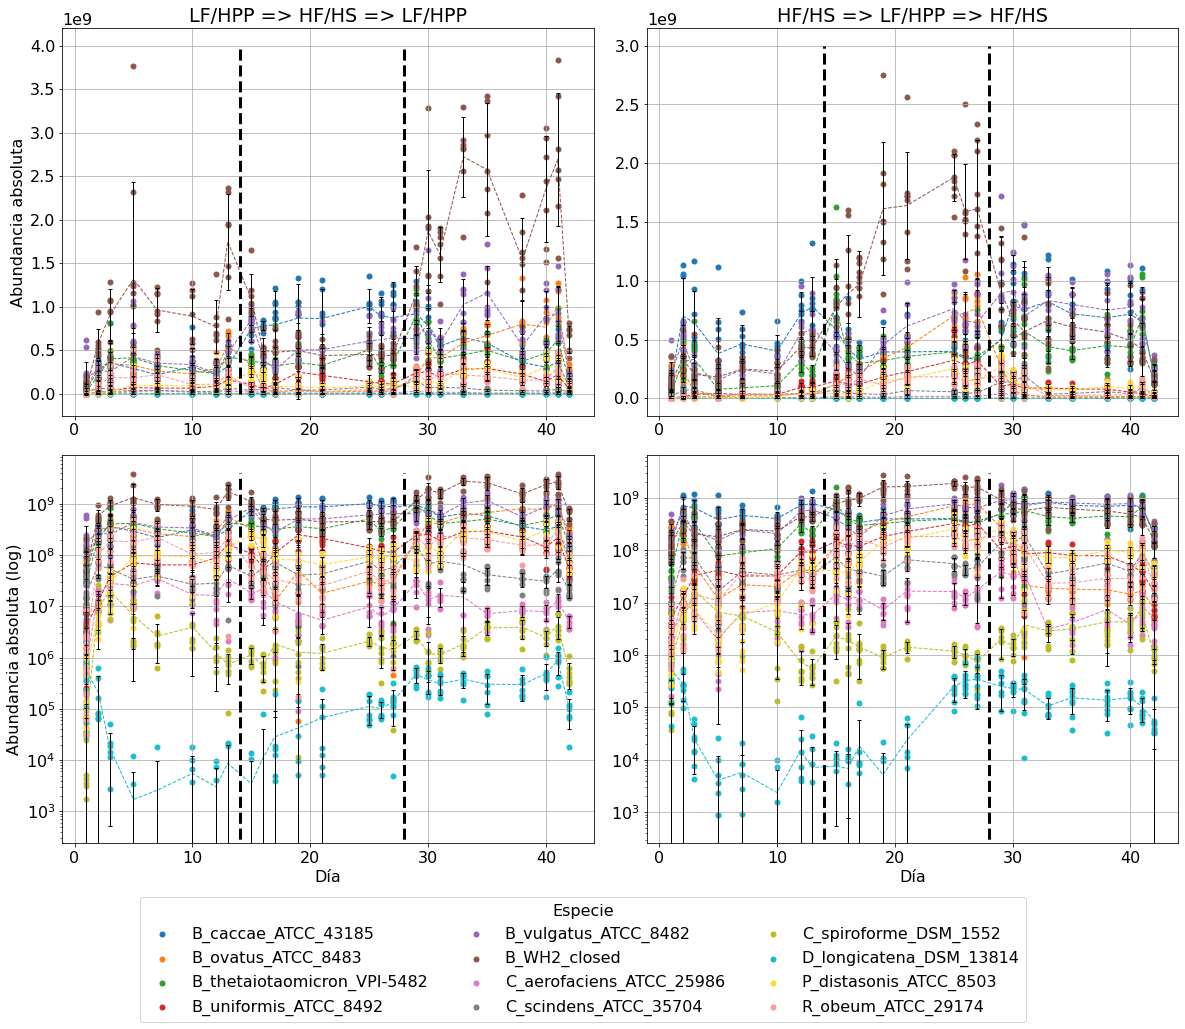

In [51]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
plt.subplot(2, 2, 1)
col = 0
for i in LF0.Strain.unique():
    x_LF0 = {}
    y_LF0 = {}
    x_LF0[i] = LF0[LF0.Strain == i].Day.values
    y_LF0[i] = LF0[LF0.Strain == i].Absolute_abundance.values
    plt.scatter(x_LF0[i], y_LF0[i], label=i, s=25, color=cols[col])
    x_LF0_mean = {}
    y_LF0_mean = {}
    y_LF0_std = {}
    x_LF0_mean[i] = LF0_mean[LF0_mean.Strain == i].Day.values
    y_LF0_mean[i] = LF0_mean[LF0_mean.Strain == i].Absolute_abundance.values
    y_LF0_std[i] = LF0_std[LF0_std.Strain == i].Absolute_abundance.values
    plt.plot(x_LF0_mean[i], y_LF0_mean[i], linewidth=1, linestyle='--', color=cols[col])
    plt.errorbar(x_LF0_mean[i], y_LF0_mean[i], y_LF0_std[i], color='k', linestyle='None', elinewidth=1, capsize=2)
    col += 1
plt.vlines(x=14, ymin=0, ymax=4000000000, color='k', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=4000000000, color='k', linestyle='--', linewidth=3)
plt.ylabel('Abundancia absoluta')
plt.title('LF/HPP => HF/HS => LF/HPP')
plt.grid()

plt.subplot(2, 2, 2)
col = 0
for i in HF0.Strain.unique():
    x_HF0 = {}
    y_HF0 = {}
    x_HF0[i] = HF0[HF0.Strain == i].Day.values
    y_HF0[i] = HF0[HF0.Strain == i].Absolute_abundance.values
    plt.scatter(x_HF0[i], y_HF0[i], label=i, s=25, color=cols[col])
    x_HF0_mean = {}
    y_HF0_mean = {}
    y_HF0_std = {}
    x_HF0_mean[i] = HF0_mean[HF0_mean.Strain == i].Day.values
    y_HF0_mean[i] = HF0_mean[HF0_mean.Strain == i].Absolute_abundance.values
    y_HF0_std[i] = HF0_std[HF0_std.Strain == i].Absolute_abundance.values
    plt.plot(x_HF0_mean[i], y_HF0_mean[i], linewidth=1, linestyle='--', color=cols[col])
    plt.errorbar(x_HF0_mean[i], y_HF0_mean[i], y_HF0_std[i], color='k', linestyle='None', elinewidth=1, capsize=2)
    col += 1
plt.vlines(x=14, ymin=0, ymax=3000000000, color='k', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=3000000000, color='k', linestyle='--', linewidth=3)
plt.title('HF/HS => LF/HPP => HF/HS')
plt.grid()

plt.subplot(2, 2, 3)
col = 0
for i in LF0.Strain.unique():
    x_LF0 = {}
    y_LF0 = {}
    x_LF0[i] = LF0[LF0.Strain == i].Day.values
    y_LF0[i] = LF0[LF0.Strain == i].Absolute_abundance.values
    plt.scatter(x_LF0[i], y_LF0[i], label=i, s=25, color=cols[col])
    x_LF0_mean = {}
    y_LF0_mean = {}
    y_LF0_std = {}
    x_LF0_mean[i] = LF0_mean[LF0_mean.Strain == i].Day.values
    y_LF0_mean[i] = LF0_mean[LF0_mean.Strain == i].Absolute_abundance.values
    y_LF0_std[i] = LF0_std[LF0_std.Strain == i].Absolute_abundance.values
    plt.plot(x_LF0_mean[i], y_LF0_mean[i], linewidth=1, linestyle='--', color=cols[col])
    plt.errorbar(x_LF0_mean[i], y_LF0_mean[i], y_LF0_std[i], color='k', linestyle='None', elinewidth=1, capsize=2)
    col += 1
plt.vlines(x=14, ymin=0, ymax=4000000000, color='k', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=4000000000, color='k', linestyle='--', linewidth=3)
plt.yscale('log')
plt.xlabel('Día')
plt.ylabel('Abundancia absoluta (log)')
plt.grid()

plt.subplot(2, 2, 4)
col = 0
for i in HF0.Strain.unique():
    x_HF0 = {}
    y_HF0 = {}
    x_HF0[i] = HF0[HF0.Strain == i].Day.values
    y_HF0[i] = HF0[HF0.Strain == i].Absolute_abundance.values
    plt.scatter(x_HF0[i], y_HF0[i], label=i, s=25, color=cols[col])
    x_HF0_mean = {}
    y_HF0_mean = {}
    y_HF0_std = {}
    x_HF0_mean[i] = HF0_mean[HF0_mean.Strain == i].Day.values
    y_HF0_mean[i] = HF0_mean[HF0_mean.Strain == i].Absolute_abundance.values
    y_HF0_std[i] = HF0_std[HF0_std.Strain == i].Absolute_abundance.values
    plt.plot(x_HF0_mean[i], y_HF0_mean[i], linewidth=1, linestyle='--', color=cols[col])
    plt.errorbar(x_HF0_mean[i], y_HF0_mean[i], y_HF0_std[i], color='k', linestyle='None', elinewidth=1, capsize=2)
    col += 1
plt.vlines(x=14, ymin=0, ymax=3000000000, color='k', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=3000000000, color='k', linestyle='--', linewidth=3)
plt.legend(loc='lower center', bbox_to_anchor=(-0.12, -0.48),
          ncol=3, fancybox=True, shadow=False, title='Especie')
plt.yscale('log')
plt.xlabel('Día')
plt.grid()

# plt.savefig('HF_CV.png', bbox_inches='tight')
plt.show()

In [57]:
LF0_mean

,Strain,Day,Absolute_abundance,Cum_sum
0,B_WH2_closed,1,5.476735e+07,5.476735e+07
1,B_WH2_closed,2,5.776278e+08,5.776278e+08
2,B_WH2_closed,3,9.043846e+08,9.043846e+08
3,B_WH2_closed,5,1.317284e+09,1.317284e+09
4,B_WH2_closed,7,9.635845e+08,9.635845e+08
...,...,...,...,...
295,R_obeum_ATCC_29174,35,1.989706e+08,6.313907e+09
296,R_obeum_ATCC_29174,38,1.542769e+08,4.238520e+09
297,R_obeum_ATCC_29174,40,1.593465e+08,5.438707e+09
298,R_obeum_ATCC_29174,41,3.044209e+08,6.474769e+09


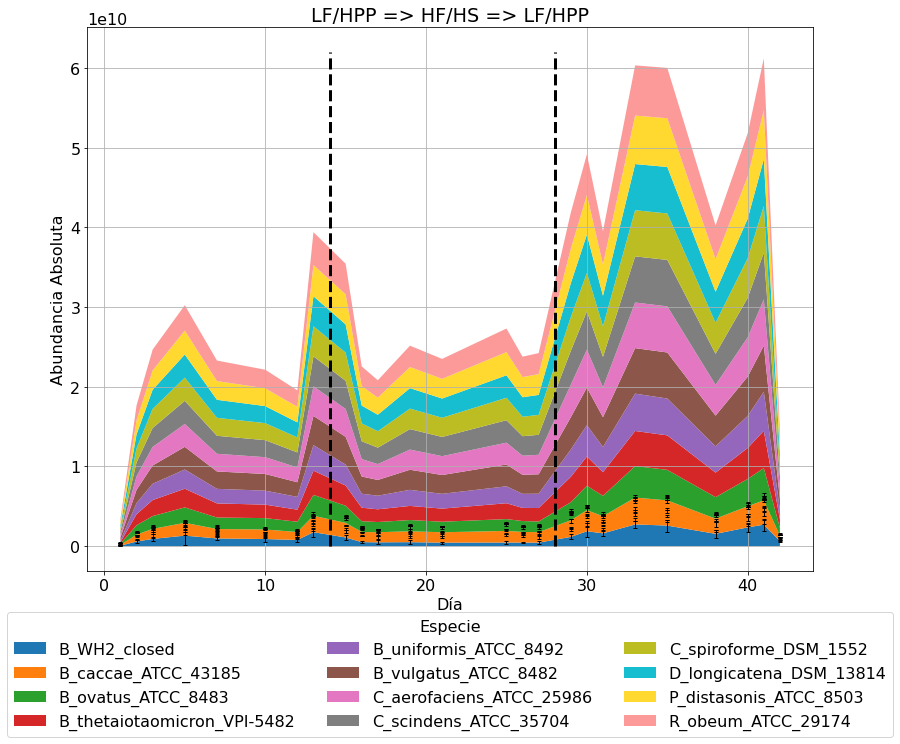

In [73]:
x_LF = LF0_mean.Day.unique()
y_LF = {}
for i in LF0_mean.Strain.unique():
    y_LF[i] = LF0_mean[LF0_mean.Strain == i].Cum_sum.values
plt.figure(figsize=(13, 10))
plt.stackplot(x_LF, y_LF.values(), labels=y_LF.keys(), colors=cols)
plt.vlines(x=14, ymin=0, ymax=6.2e10, color='k', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=6.2e10, color='k', linestyle='--', linewidth=3)
plt.errorbar(LF0_mean['Day'], LF0_mean['Cum_sum'], yerr=LF0_std['Absolute_abundance'], color='k', linestyle='None', elinewidth=1, capsize=2)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.32),
          ncol=3, fancybox=True, shadow=False, title='Especie')
# plt.yscale('log')
plt.xlabel('Día')
plt.ylabel('Abundancia Absoluta')
plt.title('LF/HPP => HF/HS => LF/HPP')
plt.grid()
# plt.savefig('LF.png', bbox_inches='tight')
plt.show()